# IPL Analysis
The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. 

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd
#! pip install pandas-profiling
from pandas_profiling import ProfileReport

import seaborn as sns
import missingno as msno
from scipy import stats
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('matches.csv',index_col=0)
df.head()

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df.apply(lambda x:sum(x.isnull()))

Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [4]:
df.apply(lambda x:len(x.unique()))

Season              12
city                33
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              16
win_by_runs         89
win_by_wickets      11
player_of_match    227
venue               41
umpire1             62
umpire2             66
umpire3             26
dtype: int64

In seasons column IPL- was prepended to year. Removing IPL- will convert Season column to use as year wise data.

umpire3 column has lot of NaN data, so drop that column.

In [5]:
df.Season=df.Season.str.replace(r'IPL-','').astype(int)
df.drop(columns=["umpire3"], inplace = True)

Many teams has changed their names over the years so we consider those as same team (depending on the city) and fill some na attributes

In [6]:
df.umpire1=df.umpire1.fillna("-")
df.umpire2=df.umpire2.fillna("-")

df = df.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
df = df.replace('Pune Warriors', 'Rising Pune Supergiant')
df = df.replace('Deccan Chargers', 'Sunrisers Hyderabad')
df = df.replace('Delhi Capitals', 'Delhi Daredevils')

In [7]:
#Remove records which does not have valid information. So we can remove data basrd on results (no result)
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
301,2011,Delhi,21-05-2011,Delhi Daredevils,Rising Pune Supergiant,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
462,2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
463,2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
467,2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
469,2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
470,2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
475,2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
477,2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus
546,2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak


In [8]:
df.dropna(inplace=True)
df.isnull().sum()

Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [9]:
df.describe()

,Season,dl_applied,win_by_runs,win_by_wickets
count,745.000000,745.000000,745.000000,745.000000
mean,2013.430872,0.025503,13.444295,3.369128
std,3.382968,0.157754,23.599650,3.391460
min,2008.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,4.000000
75%,2016.000000,0.000000,19.000000,6.000000
max,2019.000000,1.000000,146.000000,10.000000


## Data Visualization

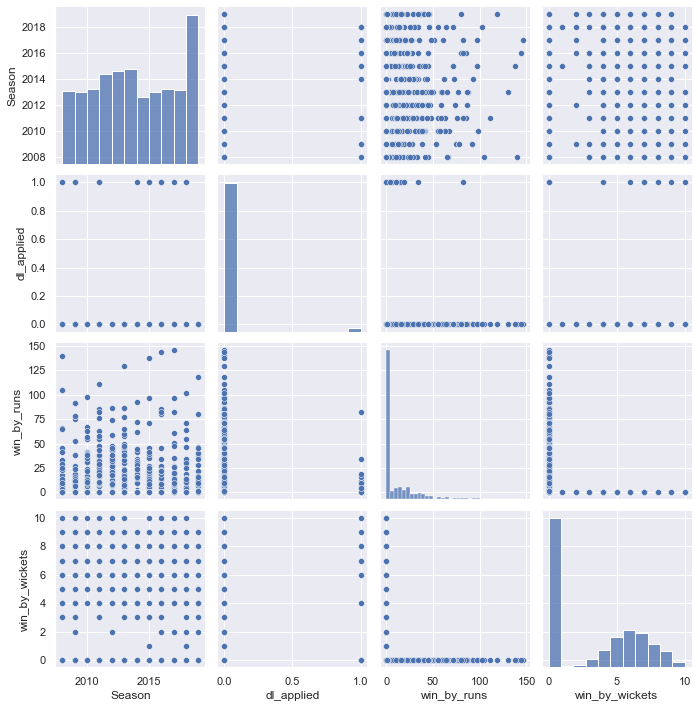

In [10]:
sns.pairplot(df)

<AxesSubplot:>

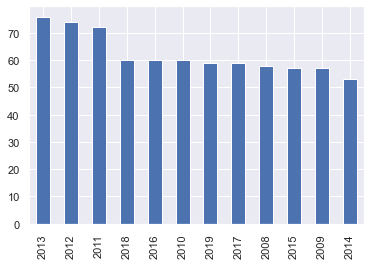

In [11]:
#Number of matches played in each year
df.Season.value_counts().plot(kind="bar")

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64


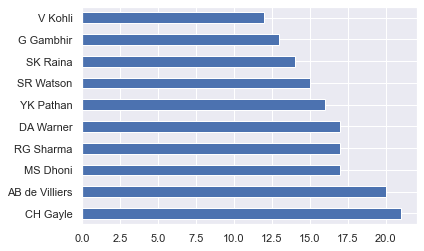

In [12]:
player=df['player_of_match'].value_counts()[:10]
player.plot(kind='barh')
print(player)

Mumbai Indians                 109
Chennai Super Kings             98
Kolkata Knight Riders           92
Sunrisers Hyderabad             85
Royal Challengers Bangalore     83
Kings XI Punjab                 81
Delhi Daredevils                76
Rajasthan Royals                75
Rising Pune Supergiant          27
Gujarat Lions                   13
Kochi Tuskers Kerala             6
Name: winner, dtype: int64


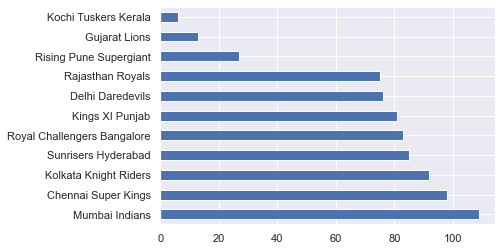

In [13]:
team=df['winner'].value_counts()
team.plot(kind='barh')
print(team)

<AxesSubplot:>

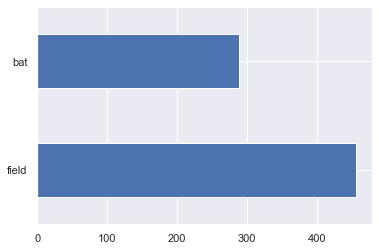

In [14]:
# After winning the toss
df['toss_decision'].value_counts()
df['toss_decision'].value_counts().plot(kind='barh')

<AxesSubplot:>

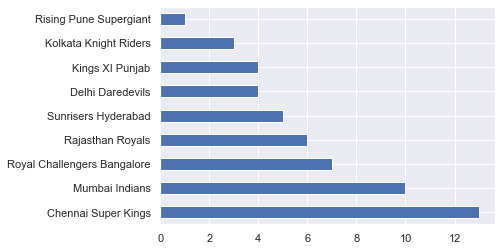

In [15]:
#Which team won most number of matches with the margin of more than 50 runs
df.loc[df.win_by_runs > 50, "winner"].value_counts().plot(kind="barh")

<AxesSubplot:>

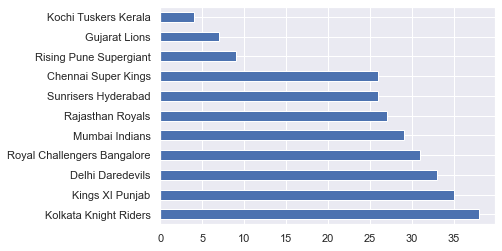

In [16]:
#Which team won most number of matches with the margin of more than 5 wickets.
df.loc[df.win_by_wickets>5,'winner'].value_counts().plot(kind='barh')

Chennai Super Kings            57
Mumbai Indians                 56
Kolkata Knight Riders          53
Rajasthan Royals               42
Delhi Daredevils               42
Sunrisers Hyderabad            41
Royal Challengers Bangalore    40
Kings XI Punjab                34
Rising Pune Supergiant         11
Gujarat Lions                  10
Kochi Tuskers Kerala            4
Name: winner, dtype: int64


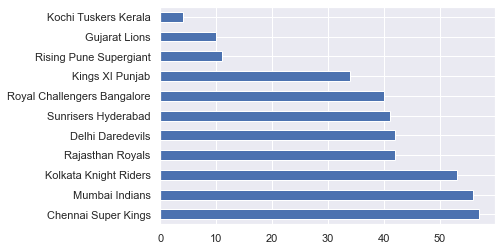

In [17]:
#Toss winner won the match? 
df.loc[df.toss_winner == df.winner, "winner"].value_counts().plot(kind="barh")
print(df.loc[df.toss_winner == df.winner, "winner"].value_counts())

In [18]:
#Head to head team records
teams = df.team1.unique().tolist()
teams.sort()
for team1 in teams:
    for team2 in df.team2.unique().tolist():
        df_ttw = df.loc[(df["team1"] == team1) & (df["team2"] == team2), "winner"]
        if len(df_ttw) > 0:
            print(df_ttw.value_counts())

Chennai Super Kings            6
Royal Challengers Bangalore    4
Name: winner, dtype: int64
Chennai Super Kings       3
Rising Pune Supergiant    1
Name: winner, dtype: int64
Kolkata Knight Riders    7
Chennai Super Kings      5
Name: winner, dtype: int64
Chennai Super Kings    7
Kings XI Punjab        4
Name: winner, dtype: int64
Chennai Super Kings    9
Delhi Daredevils       4
Name: winner, dtype: int64
Chennai Super Kings    8
Sunrisers Hyderabad    5
Name: winner, dtype: int64
Mumbai Indians         7
Chennai Super Kings    5
Name: winner, dtype: int64
Chennai Super Kings    6
Rajasthan Royals       5
Name: winner, dtype: int64
Kochi Tuskers Kerala    1
Chennai Super Kings     1
Name: winner, dtype: int64
Royal Challengers Bangalore    8
Delhi Daredevils               4
Name: winner, dtype: int64
Delhi Daredevils          3
Rising Pune Supergiant    2
Name: winner, dtype: int64
Kolkata Knight Riders    7
Delhi Daredevils         3
Name: winner, dtype: int64
Kings XI Punjab     9


<AxesSubplot:>

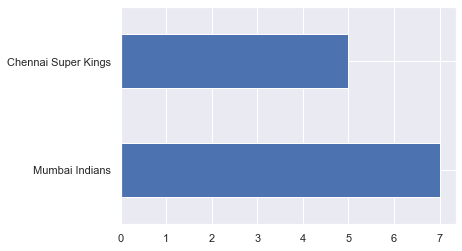

In [19]:
df.loc[(df["team1"] == "Chennai Super Kings") & (df["team2"] == "Mumbai Indians"), "winner"].value_counts().plot(kind="barh")

<AxesSubplot:>

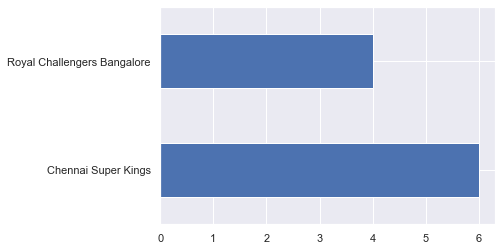

In [20]:
df.loc[(df["team1"] == "Chennai Super Kings") & (df["team2"] == "Royal Challengers Bangalore"), "winner"].value_counts().plot(kind="barh")

In [21]:
df = df[df['city'].notna()]
city = df.city.unique().tolist()

### Mapping city and venues in the map

In [22]:
#!pip install opencage
from opencage.geocoder import OpenCageGeocode
#!pip install folium
import folium
key = "ec38974f44884f42bfa871dc36b8a090"  
geocoder = OpenCageGeocode(key)
india = geocoder.geocode("India")
lat = india[0]['geometry']['lat']
lng = india[0]['geometry']['lng']
map = folium.Map(location=[lat, lng], zoom_start=2)
for query in city:
    pop = query
    if query == "Kochi":
        query = "Kochi India"
    results = geocoder.geocode(query)
    lat = results[0]['geometry']['lat']
    lng = results[0]['geometry']['lng']
    folium.Marker((lat, lng), popup=pop).add_to(map)
map